In [175]:
# import numpy as np
# import os
# def read_npy(dir):
#     print(dir)
#     data = np.load(dir)
#     return data
# def read_feature(feature_name, label_name):
#     root = '/mnt/dataset0/**/workspace/Covariance_EEG_Emotion/visualize'
#     feature_dir = os.path.join(root, feature_name)
#     label_dir = os.path.join(root, label_name)
#     return read_npy(feature_dir), read_npy(label_dir)

In [176]:
# # fea_name = 'feature_CDA=True/SEED/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NOLDS.npy'
# fea_name = 'feature_CDA=False/SEED/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NOLDS.npy'
# label_name = 'feature_CDA=True/SEED/onesub_label.npy'
# fea, onesub_label = read_feature(fea_name, label_name)
# n_fea = fea.shape[0]
# n_sub = 15
# n_clip_per_sub = n_fea // n_sub
# label_sub = np.array([[i] * n_clip_per_sub for i in range(n_sub)]).reshape((n_fea, 1))
# # label_emotion = np.tile(onesub_label, n_sub).reshape((n_fea, 1))
# label_emotion = np.full((n_fea, 1), 0).reshape((n_fea, 1))


In [177]:
# # fea_name_2 = 'feature_CDA=True/DEAP/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NOLDS.npy'
# fea_name_2 = 'feature_CDA=False/DEAP/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NOLDS.npy'
# label_name_2 = 'feature_CDA=True/DEAP/onesub_label.npy'
# fea_2, onesub_label_2 = read_feature(fea_name_2, label_name_2)
# n_sub_2 = 16
# n_fea_2 = fea_2.shape[0]
# n_clip_per_sub_2 = n_fea_2 // n_sub_2
# label_sub_2 = np.array([[i+15] * n_clip_per_sub_2 for i in range(n_sub_2)]).reshape((n_fea_2, 1))
# # label_emotion_2 = np.tile(onesub_label_2, n_sub_2).reshape((n_fea_2, 1))
# label_emotion_2 = np.full((n_fea_2, 1), 1).reshape((n_fea_2, 1))

# fea = np.concat([fea, fea_2])
# label_sub = np.concat([label_sub, label_sub_2])
# label_set = np.concat([label_emotion, label_emotion_2])
# print(fea.shape)
# print(label_set.shape)

In [2]:
import numpy as np
def loadfea_single(fea_name, n_sub, set_index, ave=False, return_emo=False, emo_label_name='onesub_label.npy'):
    fea = np.load(fea_name)
    n_fea = fea.shape[0]
    n_clip_per_sub = n_fea // n_sub
    if ave:
        fea = fea.reshape(n_sub, n_clip_per_sub, -1).mean(axis=1)
    label_sub = np.array([[i] * n_clip_per_sub for i in range(n_sub)]).reshape((n_fea, 1))
    label_set = np.full_like(label_sub, set_index)
    
    if(return_emo):
        emo_label = np.load(emo_label_name)
        emo_label = np.tile(emo_label, n_sub)
        return fea, label_sub, emo_label
    else:
        return fea, label_sub, label_set

def loadfea_all(fea_names, n_subs):
    data = [loadfea_single(fea_names[i], n_subs[i], i) for i in range(len(fea_names))]
    fea = [data_i[0] for data_i in data]
    label_sub = [data_i[1] + (n_subs[i-1] if i>0 else 0)  for i, data_i in enumerate(data)]
    label_set = [data_i[2] for data_i in data]
    fea = np.concat(fea)
    label_sub = np.concat(label_sub).astype(int)
    label_set = np.concat(label_set).astype(int)
    return fea, label_sub, label_set

def loadfea_emo(fea_names, n_subs):
    data = [loadfea_single(fea_names[i], n_subs[i], i) for i in range(len(fea_names))]
    fea = [data_i[0] for data_i in data]
    label_sub = [data_i[1] + (n_subs[i-1] if i>0 else 0)  for i, data_i in enumerate(data)]
    label_set = [data_i[2] for data_i in data]
    fea = np.concat(fea)
    label_sub = np.concat(label_sub).astype(int)
    label_set = np.concat(label_set).astype(int)
    return fea, label_sub, label_set

In [ ]:

# fea_names = [
#                 'feature_CDA=False/SEED/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NONORM.npy',
#                 'feature_CDA=False/SEEDV/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NONORM.npy',
#                 'feature_CDA=False/DEAP/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NONORM.npy',
#                 'feature_CDA=False/SEEDVII/BALANCED_S1S4S7D_CDA=0_all_fea_epoch=19.ckptme_NONORM.npy',
#              ]
fea_names = [
                'feature_CDA=True/SEED/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NONORM.npy',
                'feature_CDA=True/SEEDV/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NONORM.npy',
                'feature_CDA=True/DEAP/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NONORM.npy',
                'feature_CDA=True/SEEDVII/BALANCED_S1S4S7D_all_fea_epoch=19.ckptme_NONORM.npy',
             ]
n_subs = [
    15, 
    16, 
    32, 
    20,
    ]
set_name = ['SEED', 'SEEDV', 'DEAP', 'SEEDVII']
# n_subs = [15, 16]
fea, label_sub, label_set = loadfea_all(fea_names, n_subs)
print(fea.shape, label_sub.shape, label_set.shape)

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import defaultdict
import random

# 假设输入数据格式：
# fea = np.array([n_fea, dim_fea])
# label_sub = np.array([n_fea, 1])  被试序号 (如 0,1,2,...)
# label_emotion = np.array([n_fea, 1]) 情绪标签 (如 0,1,2,...)

def balanced_sample_visualization(fea, label_sub, label_emotion, color_name, sample_per_sub=50, seed=42, title='None title', size=40,
                                  perplexity = 30,
                                  lr='auto',
                                  max_iter=None,
                                  alpha=1):
    # 1. 均衡抽样（保持不变）
    sub_indices = defaultdict(list)
    for idx, sub in enumerate(label_sub):
        sub_indices[sub[0]].append(idx)
    
    sampled_indices = []
    for sub, indices in sub_indices.items():
        if len(indices) > sample_per_sub:
            sampled = random.sample(indices, sample_per_sub)
        else:
            sampled = indices
        sampled_indices.extend(sampled)
    
    # 2. 获取抽样后的数据
    sampled_fea = fea[sampled_indices]
    sampled_sub = label_sub[sampled_indices].flatten()
    sampled_emo = label_emotion[sampled_indices].flatten()
    print(sampled_indices)
    
    # 3. t-SNE降维
    tsne = TSNE(n_components=2, random_state=seed, perplexity=perplexity, learning_rate=lr, 
                max_iter=max_iter)
    fea_2d = tsne.fit_transform(sampled_fea)
    
    # 4. 可视化
    plt.figure(figsize=(11, 8))
    subjects = np.unique(sampled_sub)
    emotions = np.unique(sampled_emo)
    print(f'{subjects} subs, {emotions} emotions')
    
    # 准备形状和颜色
    # markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '.', '1']
    markers = ['o']
    colors = plt.cm.get_cmap('Set1')
    
    
    # 绘制所有点（形状=subject，颜色=emotion）
    for sub in subjects:
        sub_mask = (sampled_sub == sub)
        for emo in emotions:
            emo_mask = (sampled_emo == emo)
            mask = sub_mask & emo_mask
            
            if np.sum(mask) > 0:
                plt.scatter(
                    fea_2d[mask, 0], fea_2d[mask, 1],
                    marker=markers[sub % len(markers)],
                    color=colors(emo),
                    alpha=alpha,
                    s=size
                )
    
    # 自定义图例：分两部分生成
    legend_elements = []
    print(color_name)
    # 第一部分：情绪（全部用圆形+不同颜色）
    for emo in emotions:
        legend_elements.append(
            plt.Line2D([0], [0], 
                      marker='o', 
                      color='w',
                      markerfacecolor=colors(emo),
                      markersize=10,
                      label=f'{color_name[emo]}')
        )
    
    # # 第二部分：被试（全部用黑色+不同形状）
    # for sub in subjects[:len(markers)]:  # 避免形状不够用
    #     legend_elements.append(
    #         plt.Line2D([0], [0], 
    #                   marker=markers[sub % len(markers)],
    #                   color='w',
    #                   markerfacecolor='k',
    #                   markersize=10,
    #                   label=f'Subject {sub}')
    #     )
    
    # 创建图例（分两列显示节省空间）
    plt.legend(handles=legend_elements, 
            #    bbox_to_anchor=(1.05, 1), 
               loc='upper right',
               fontsize=16)
    # plt.xlabel('Dimension 1', size=3)
    # plt.ylabel('Dimension 2', size=3)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    plt.title('')
    plt.tight_layout()
    plt.show()


In [ ]:

balanced_sample_visualization(fea, label_sub, label_set, sample_per_sub=25)

In [ ]:

balanced_sample_visualization(fea, label_sub, label_set, sample_per_sub=25)

In [441]:
fea_names = [
                't-sne/CDA=1e-2/SEED/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
                't-sne/CDA=1e-2/SEEDIV/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
                # 't-sne/CDA=1e-2/SEEDV/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
                # 't-sne/CDA=1e-2/SEEDVII/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
                # 't-sne/CDA=1e-2/FACED/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
                # 't-sne/CDA=1e-2/DEAP/DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy',
             ]
n_subs = [
    15, 
    15, 
    # 16, 
    # 20,
    # 20,
    # 32
    ]
set_name = [
            'SEED', 
            'SEEDIV', 
            # 'SEEDV', 
            # 'SEEDVII',
            # 'FACED',
            # 'DEAP'
            ]
fea, label_sub, label_set = loadfea_all(fea_names, n_subs)
print(fea.shape, label_sub.shape, label_set.shape)

balanced_sample_visualization(fea, label_sub, label_set, sample_per_sub=25, title='CDA=1e-2')

(227355, 512) (227355, 1) (227355, 1)


TypeError: balanced_sample_visualization() missing 1 required positional argument: 'color_name'

(75510, 300) (75510, 1) (75510,)
[2870, 5015, 4700, 4840, 608, 664, 418, 1138, 1275, 4283, 2554, 3810, 122, 170, 2087, 2023, 1750, 1748, 4852, 4136, 5630, 9358, 7727, 8652, 9794, 7380, 6325, 7386, 5612, 8461, 7431, 8241, 9480, 5908, 5074, 8657, 7782, 7332, 8308, 7974, 12481, 10265, 14083, 10774, 12816, 14541, 10606, 12856, 13771, 10165, 11315, 13473, 12281, 13214, 12897, 14855, 10354, 10626, 14820, 10969, 17265, 18354, 18932, 17873, 15746, 15515, 18999, 16092, 18138, 17073, 16589, 15813, 20110, 15314, 17947, 15450, 18849, 17407, 15960, 19716, 22228, 23410, 20249, 24834, 22444, 22638, 21266, 23480, 23869, 21912, 22081, 22948, 20230, 20281, 21052, 24871, 20354, 24107, 23931, 23922, 30053, 29545, 28333, 28201, 27753, 25741, 29589, 28657, 25854, 25694, 30101, 26681, 30149, 28717, 27747, 28364, 26723, 30118, 25835, 25515, 33687, 35216, 30750, 34339, 34643, 32752, 34268, 32342, 31071, 32697, 33195, 33989, 30754, 33435, 34526, 32869, 33530, 30570, 34597, 34221, 35594, 35624, 37228, 39180, 396

/tmp/ipykernel_2799179/2054127645.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(emotions))


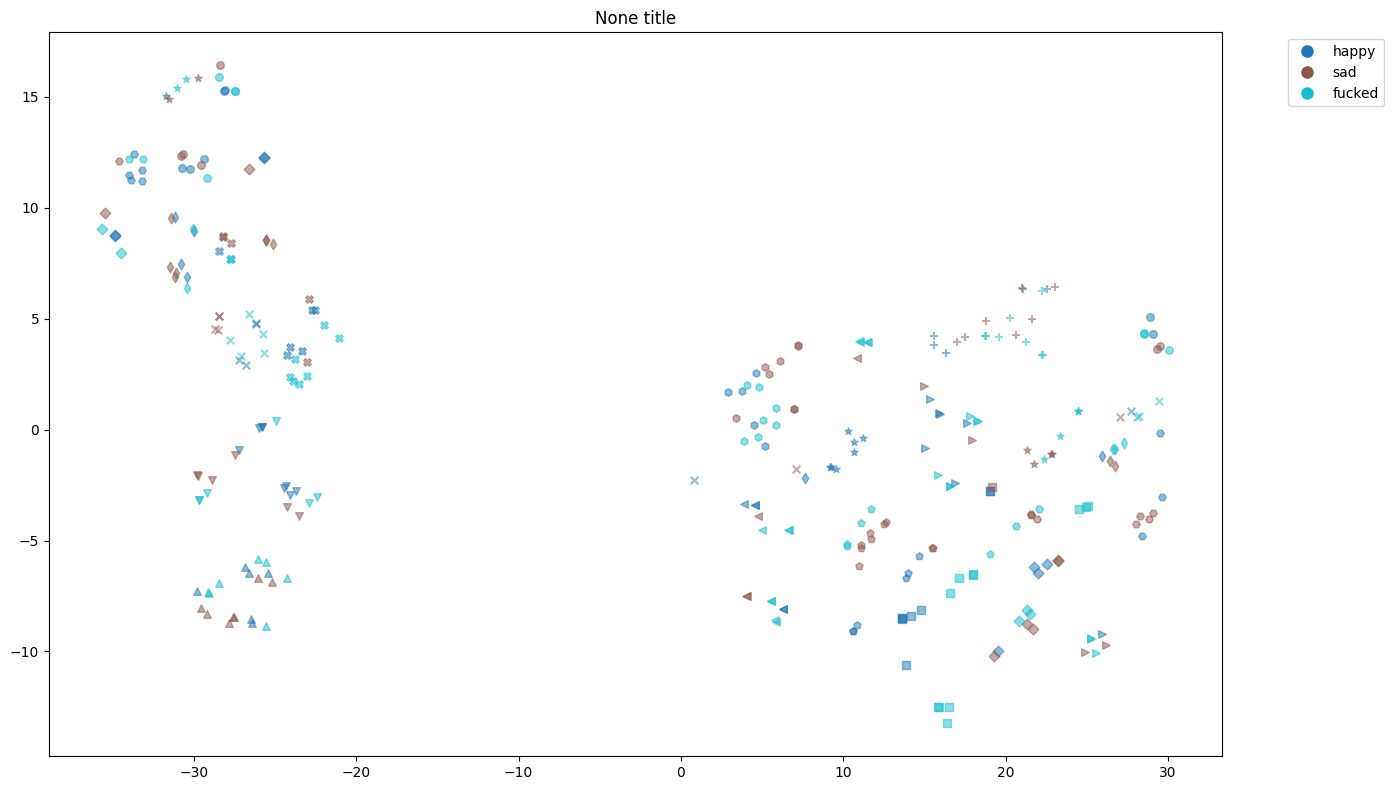

In [230]:
root_dir = 't-sne/ME/SEED/'
fea_name = root_dir+'ME_NONORM_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'happy',
    'sad',
    'fucked'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo, sample_per_sub=20, color_name=emo_names)

(75510, 512) (75510, 1) (75510,)
[1116, 1656, 2235, 936, 4643, 1527, 4951, 3969, 1223, 230, 5000, 4020, 1564, 3371, 3229, 978, 676, 4309, 281, 1051, 3009, 210, 926, 1364, 819, 2266, 3102, 4473, 4658, 246, 84, 2851, 2629, 1931, 4080, 4377, 2676, 1501, 42, 3699, 1953, 2307, 2705, 3235, 3003, 2791, 1885, 57, 1811, 2965, 1620, 4173, 627, 2400, 4226, 3960, 2743, 2886, 4099, 3292, 1674, 1317, 1574, 1767, 815, 3255, 1814, 1618, 4430, 4273, 4620, 2224, 3609, 2134, 2120, 413, 1713, 3553, 1345, 1385, 3841, 3186, 2088, 2998, 1926, 2578, 2117, 1067, 4269, 4433, 3422, 2315, 4204, 495, 1737, 4303, 1887, 2751, 3975, 1403, 3852, 400, 4295, 3166, 1669, 2920, 587, 4047, 659, 2121, 1555, 4839, 377, 2495, 4790, 4638, 998, 2428, 3314, 850, 775, 5014, 3563, 4283, 1003, 4270, 807, 532, 141, 3738, 4481, 4454, 1935, 1605, 4179, 2144, 3764, 453, 3776, 1089, 4540, 1176, 414, 290, 4791, 2340, 3444, 4995, 2758, 3916, 4561, 2718, 4539, 2388, 1633, 874, 3488, 3249, 3634, 173, 1741, 2328, 3056, 108, 515, 4278, 2279, 

/tmp/ipykernel_2799179/3270084735.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


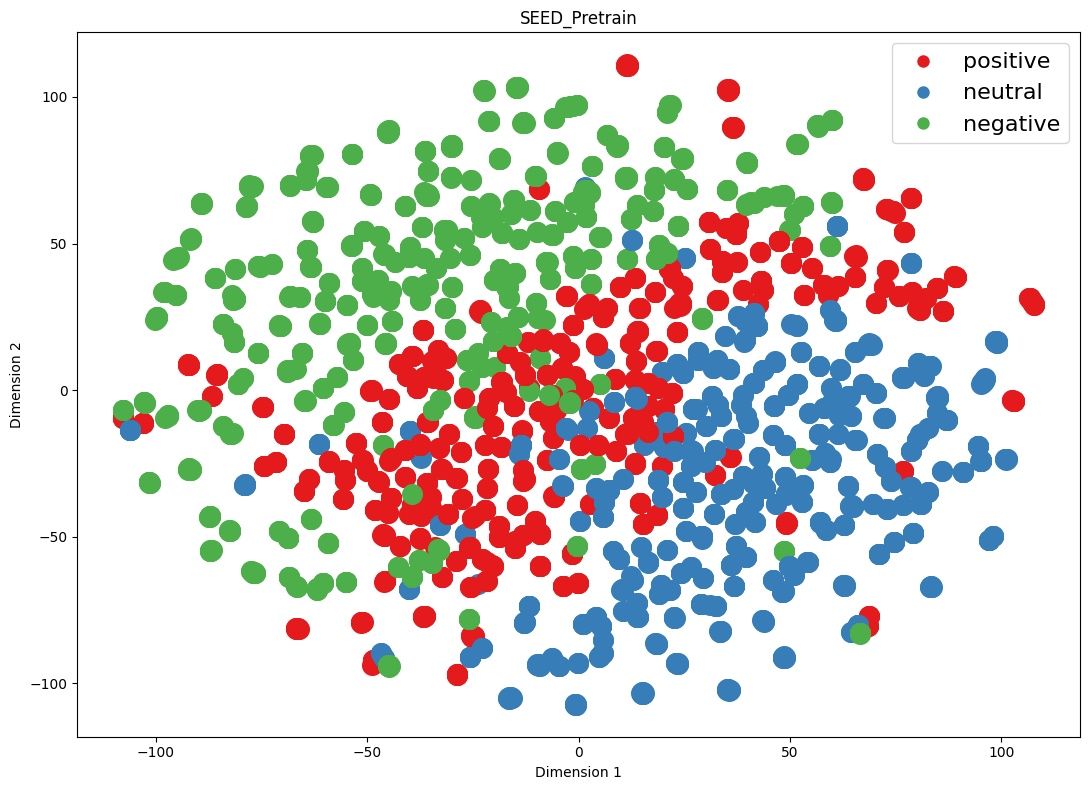

In [452]:
root_dir = 't-sne/LOO/SEED/'
fea_name = root_dir+'DATASET_loo_SEED_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'positive',
    'neutral',
    'negative'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=200,
                            color_name=emo_names,
                            size=200,
                            title='SEED_Pretrain',
                            perplexity=8)

(75510, 300) (75510, 1) (75510,)
[1552, 360, 3299, 4285, 2381, 323, 429, 2720, 4752, 3590, 2885, 4685, 2113, 996, 882, 4630, 212, 4429, 3278, 1511, 2422, 2007, 525, 3283, 4022, 3359, 4598, 4560, 3370, 3760, 3035, 2796, 1641, 2800, 2873, 1139, 1113, 4034, 678, 3550, 4554, 4199, 4391, 457, 4061, 2174, 1141, 4071, 1877, 12, 1189, 597, 1808, 3918, 3492, 2075, 3143, 1932, 4935, 2848, 4150, 3826, 1387, 1412, 4145, 4604, 1452, 4831, 4826, 4902, 1520, 2448, 2254, 3430, 4889, 698, 4252, 4309, 2905, 5029, 574, 423, 560, 4314, 96, 1411, 1122, 916, 2063, 567, 4983, 351, 1081, 883, 2437, 1517, 4107, 4324, 3626, 1183, 2439, 1991, 693, 2717, 4012, 4069, 564, 1466, 1615, 1180, 1330, 2992, 984, 253, 2232, 2900, 270, 320, 657, 2525, 3640, 199, 1846, 4568, 3808, 3262, 4406, 3800, 519, 3583, 824, 4238, 4962, 1753, 3313, 690, 294, 4516, 4029, 3500, 4641, 4564, 18, 45, 1457, 545, 4994, 3915, 274, 629, 4373, 2024, 2083, 2195, 2804, 176, 167, 1392, 309, 1427, 4216, 1623, 1821, 3790, 2998, 3084, 2357, 810, 828

/tmp/ipykernel_2799179/3270084735.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


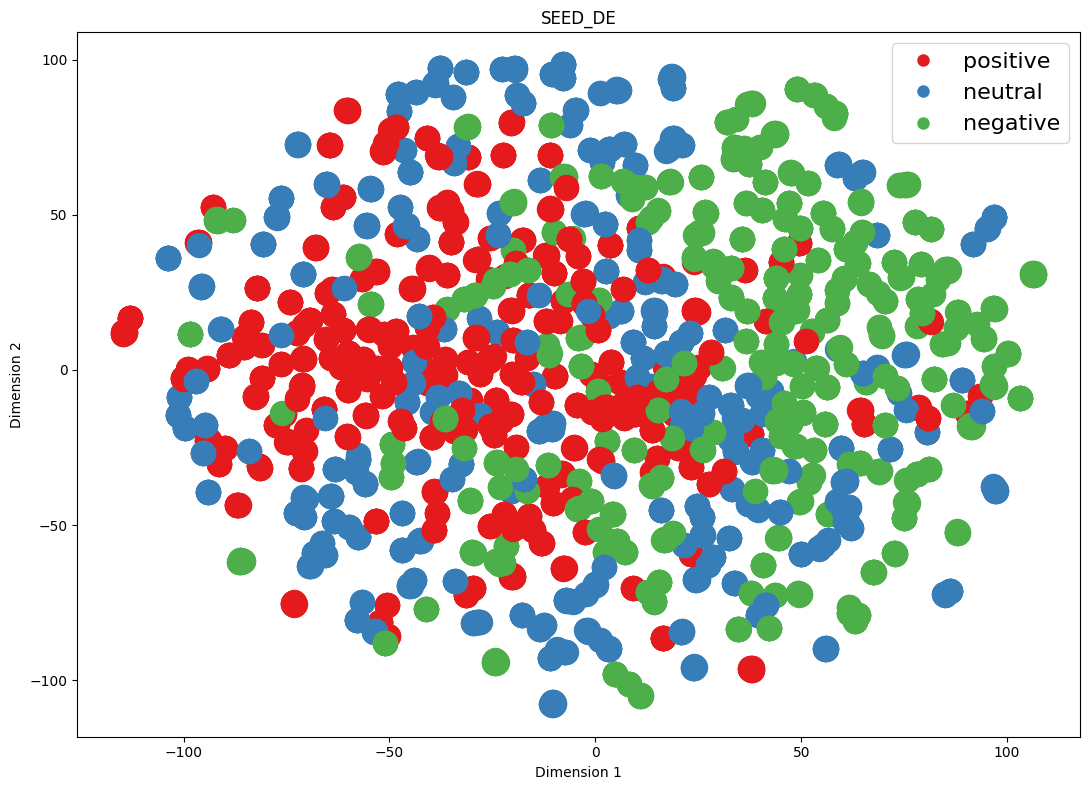

In [453]:
root_dir = 't-sne/ME/SEED/'
fea_name = root_dir+'SEED_ME_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'positive',
    'neutral',
    'negative'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=200,
                            color_name=emo_names,
                            size=300,
                            title='SEED_DE',
                            perplexity=8)

(75510, 300) (75510, 1) (75510,)
[2870, 5015, 4700, 4840, 608, 664, 418, 1138, 1275, 4283, 2554, 3810, 122, 170, 2087, 2023, 1750, 1748, 4852, 4136, 5630, 9358, 7727, 8652, 9794, 7380, 6325, 7386, 5612, 8461, 7431, 8241, 9480, 5908, 5074, 8657, 7782, 7332, 8308, 7974, 12481, 10265, 14083, 10774, 12816, 14541, 10606, 12856, 13771, 10165, 11315, 13473, 12281, 13214, 12897, 14855, 10354, 10626, 14820, 10969, 17265, 18354, 18932, 17873, 15746, 15515, 18999, 16092, 18138, 17073, 16589, 15813, 20110, 15314, 17947, 15450, 18849, 17407, 15960, 19716, 22228, 23410, 20249, 24834, 22444, 22638, 21266, 23480, 23869, 21912, 22081, 22948, 20230, 20281, 21052, 24871, 20354, 24107, 23931, 23922, 30053, 29545, 28333, 28201, 27753, 25741, 29589, 28657, 25854, 25694, 30101, 26681, 30149, 28717, 27747, 28364, 26723, 30118, 25835, 25515, 33687, 35216, 30750, 34339, 34643, 32752, 34268, 32342, 31071, 32697, 33195, 33989, 30754, 33435, 34526, 32869, 33530, 30570, 34597, 34221, 35594, 35624, 37228, 39180, 396

/tmp/ipykernel_2799179/2054127645.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(emotions))


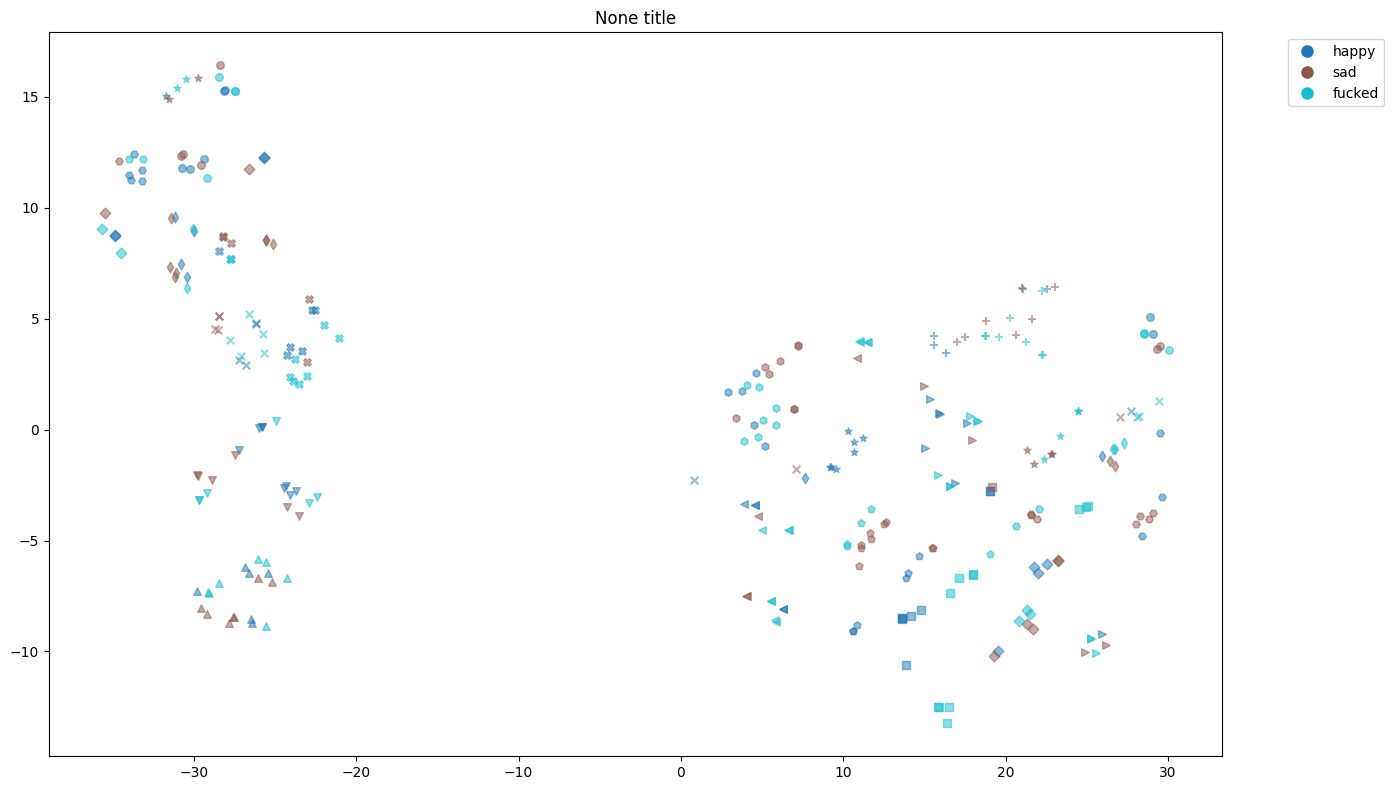

In [ ]:
root_dir = 't-sne/ME/SEED/'
fea_name = root_dir+'ME_NONORM_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'happy',
    'sad',
    'fucked'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo, sample_per_sub=20, color_name=emo_names)

(151845, 310) (151845, 1) (151845,)
[10083, 7369, 7890, 3422, 7303, 4837, 9490, 5716, 3734, 9858, 966, 1702, 8643, 7941, 8754, 6180, 1000, 7448, 4064, 5599, 2523, 4782, 9244, 8413, 6164, 7027, 8252, 7813, 9948, 9104, 5597, 3633, 8844, 7928, 9189, 7174, 439, 2955, 4949, 3691, 5850, 7367, 4527, 3398, 2767, 70, 605, 6788, 7868, 9559, 5296, 8148, 8250, 3638, 1348, 3886, 430, 3717, 3154, 1230, 6354, 9741, 7196, 6051, 2803, 8949, 7427, 4330, 9579, 6103, 8087, 8770, 6820, 3073, 1879, 8293, 882, 8768, 9250, 9502, 9954, 2533, 979, 4909, 7804, 7696, 4668, 960, 5637, 1316, 2130, 3863, 3630, 2659, 5656, 3047, 2948, 3882, 1432, 4311, 2150, 1859, 553, 3352, 9137, 3962, 773, 8239, 2619, 1984, 3733, 1647, 4415, 1543, 9630, 812, 3007, 4412, 7846, 7728, 6014, 3538, 9155, 4705, 8584, 4007, 90, 5258, 1205, 7147, 8876, 3782, 6654, 8449, 1977, 9296, 3927, 4085, 313, 6272, 8505, 445, 8764, 1799, 3901, 5771, 7230, 3008, 7211, 6409, 4050, 6429, 9484, 2911, 2287, 645, 6444, 4090, 6269, 2584, 9105, 6382, 7778, 2

/tmp/ipykernel_3356326/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


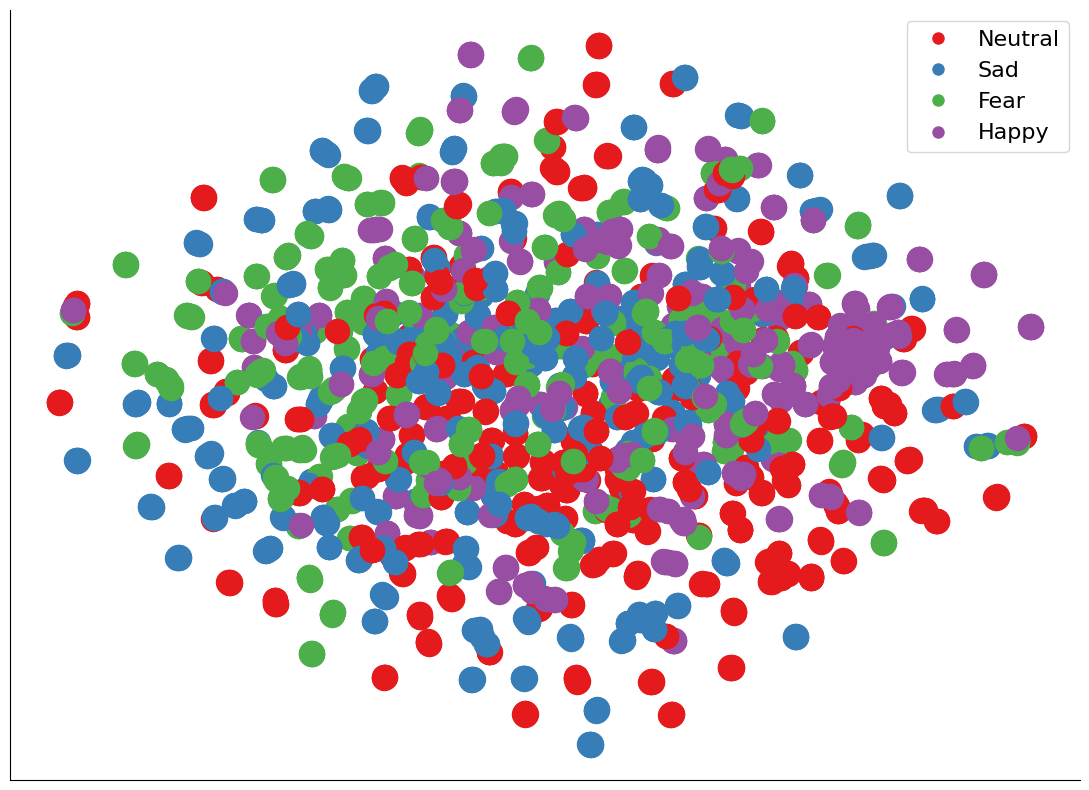

In [13]:
root_dir = 't-sne/ME/SEEDIV/'
fea_name = root_dir+'SEEDIV_ME_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'Neutral',
    'Sad',
    'Fear',
    'Happy'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=200,
                            color_name=emo_names,
                            size=300,
                            title='SEEDIV_DE',
                            lr=100,
                            max_iter=10000,
                            perplexity=4)

(151845, 512) (151845, 1) (151845,)
[103, 8100, 3683, 224, 2876, 209, 5388, 1501, 3943, 5178, 6749, 119, 4030, 7484, 7848, 6992, 6953, 5134, 6346, 6785, 2835, 5905, 7569, 7762, 2690, 8245, 6001, 1090, 2827, 7021, 3788, 4754, 3300, 7405, 6507, 1455, 5948, 151, 4639, 4287, 9044, 7691, 2985, 7635, 988, 3731, 3409, 4671, 3686, 5912, 7216, 7647, 5581, 4345, 7756, 9146, 2372, 6991, 9659, 7137, 2277, 5493, 8341, 232, 7169, 8837, 5454, 5601, 8793, 1881, 9165, 2608, 9969, 2323, 8541, 8372, 4506, 4560, 6667, 7186, 208, 8459, 4265, 8026, 9072, 5664, 764, 5099, 8973, 1786, 6782, 740, 5205, 2541, 3448, 290, 2797, 1510, 6393, 5411, 5638, 6175, 7717, 2929, 1191, 8936, 267, 3293, 954, 8221, 6596, 2078, 7899, 8679, 1862, 2739, 3928, 2095, 5532, 5580, 7713, 2796, 8360, 9015, 9998, 6230, 1913, 2665, 8501, 7231, 8351, 1280, 9841, 2898, 1445, 7152, 672, 6799, 1889, 4728, 6237, 5920, 9784, 6959, 1752, 1643, 9911, 7703, 234, 4880, 2161, 3783, 4056, 1390, 6438, 9993, 4359, 2424, 2122, 7782, 5663, 1279, 8982, 

/tmp/ipykernel_3356326/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


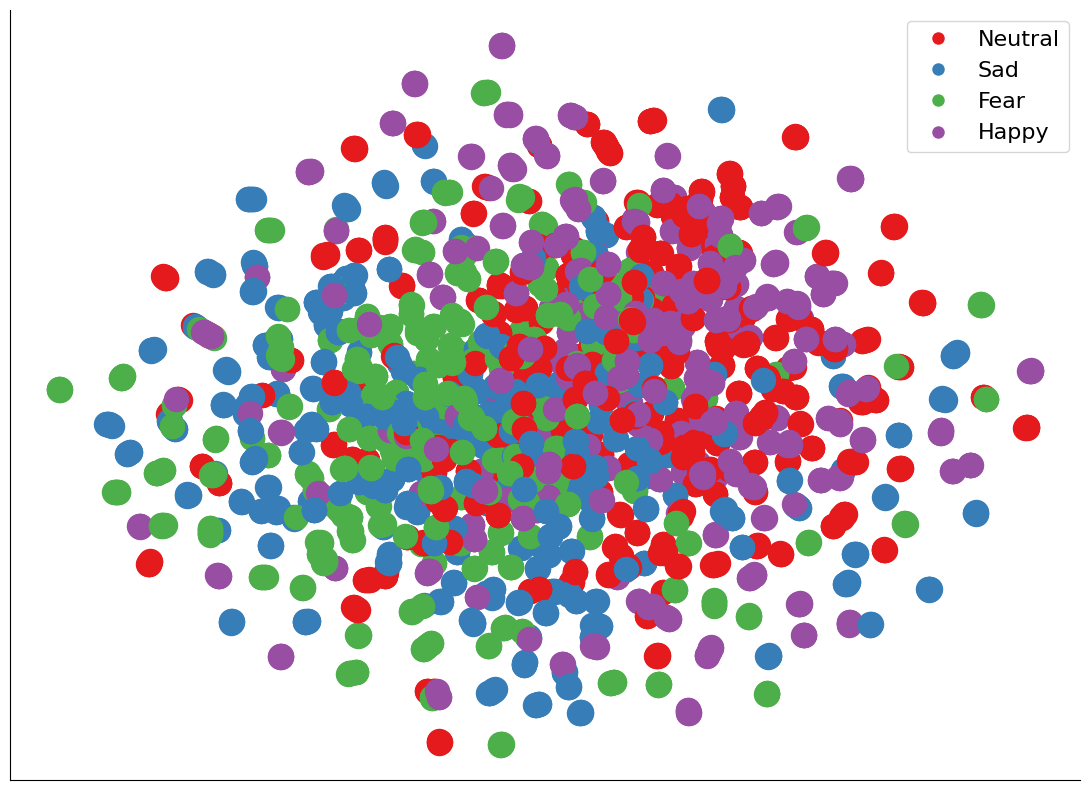

In [26]:
root_dir = 't-sne/LOO/SEEDIV/'
fea_name = root_dir+'DATASET_loo_SEEDIV_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 15
emo_names = [
    'Neutral',
    'Sad',
    'Fear',
    'Happy'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=200,
                            color_name=emo_names,
                            size=300,
                            lr=100,
                            max_iter=10000,
                            title='SEEDIV_Pretrain',
                            perplexity=4)

(57616, 300) (57616, 1) (57616,)
[386, 597, 3039, 1536, 2749, 2585, 1912, 3225, 175, 647, 2178, 553, 2738, 1191, 2038, 1462, 372, 2657, 3052, 2012, 3145, 838, 876, 2456, 1526, 2245, 3541, 1216, 3133, 908, 1082, 441, 1074, 487, 854, 2956, 1089, 680, 123, 3010, 960, 1183, 2125, 92, 788, 1811, 961, 2141, 1184, 526, 294, 1669, 2832, 2103, 1481, 547, 1500, 1717, 1293, 2833, 1251, 749, 2808, 2831, 1201, 2922, 2318, 711, 1212, 2812, 1984, 2435, 1963, 350, 1018, 1845, 2870, 2857, 2232, 200, 1257, 3038, 1155, 1542, 172, 355, 2166, 1714, 1738, 2284, 479, 541, 287, 2371, 2614, 818, 480, 1325, 161, 2158, 2384, 619, 198, 3161, 1081, 1171, 2890, 1322, 2910, 2967, 3118, 3166, 3492, 30, 1022, 461, 488, 1127, 2646, 2025, 3056, 3431, 3537, 2846, 2788, 495, 3373, 423, 1852, 2894, 2337, 3137, 1113, 3173, 542, 1118, 2586, 301, 2048, 1263, 1088, 2760, 2405, 51, 3029, 2018, 1615, 3196, 3031, 1819, 1892, 1538, 2766, 2899, 2324, 2693, 460, 1175, 103, 1871, 2807, 1447, 2191, 1027, 780, 2733, 286, 1905, 1993, 26

/tmp/ipykernel_3356326/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


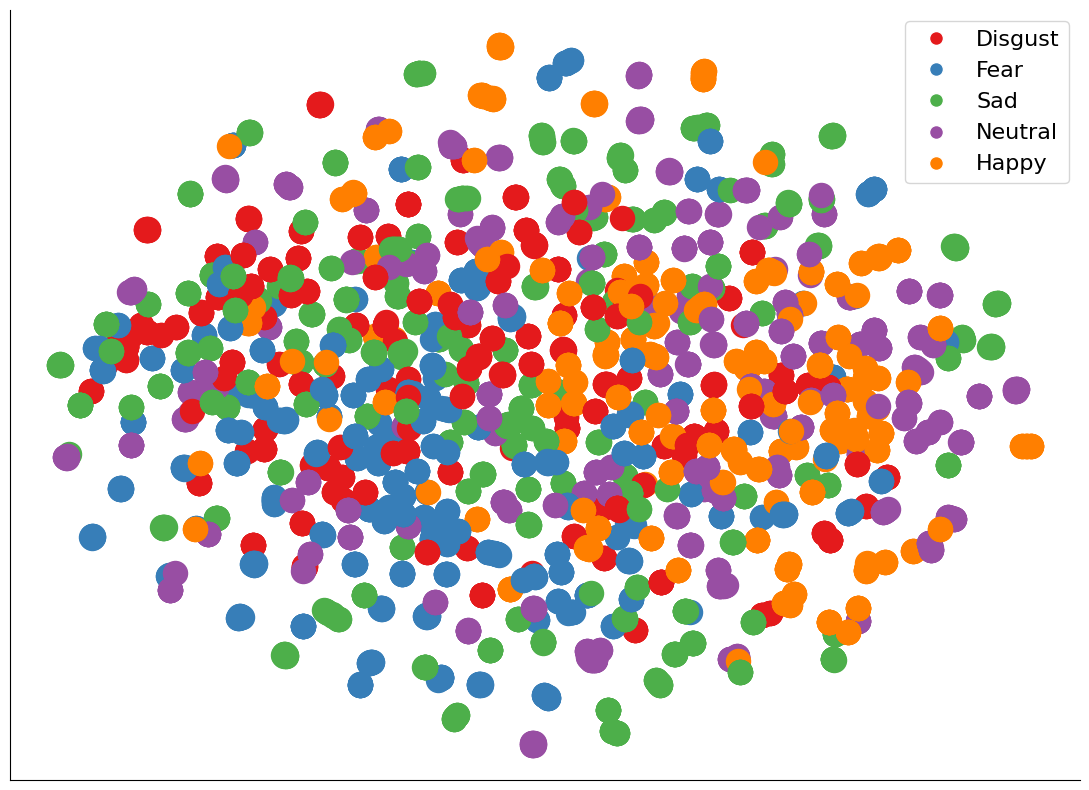

In [15]:
root_dir = 't-sne/ME/SEEDV/'
fea_name = root_dir+'SEEDV_ME_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 16
emo_names = [
    'Disgust',
    'Fear',
    'Sad',
    'Neutral',
    'Happy'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=200,
                            color_name=emo_names,
                            size=300,
                            title='SEEDV_ME',
                            perplexity=8)

(57616, 512) (57616, 1) (57616,)
[2496, 1017, 2243, 1701, 3057, 1455, 3400, 782, 761, 3553, 1765, 3176, 3564, 2285, 2774, 1756, 3377, 2969, 2490, 1152, 1742, 2007, 3460, 327, 2213, 1190, 315, 979, 1133, 1245, 538, 3233, 2766, 851, 3590, 27, 2841, 2833, 1598, 2718, 898, 1922, 3037, 222, 1374, 654, 576, 2657, 1156, 423, 645, 886, 2858, 2466, 504, 2633, 1450, 3268, 341, 43, 2829, 3515, 908, 643, 434, 1554, 2963, 3200, 2487, 3353, 2915, 639, 236, 926, 2489, 1652, 555, 1893, 899, 2547, 525, 109, 479, 1273, 923, 2231, 941, 1529, 38, 983, 2530, 2681, 411, 1431, 318, 2433, 2883, 529, 2081, 3043, 664, 3159, 1124, 1584, 1449, 2188, 293, 348, 1418, 2893, 1715, 2072, 890, 2582, 485, 1936, 977, 3266, 376, 1596, 3280, 2984, 1796, 231, 420, 891, 2038, 28, 2075, 84, 818, 3447, 2735, 2737, 2760, 1137, 2964, 1834, 311, 1764, 3322, 3044, 405, 319, 3527, 331, 42, 1248, 1879, 2686, 1739, 1542, 2573, 2292, 662, 885, 1270, 1862, 2600, 3014, 608, 832, 130, 142, 1044, 2808, 1682, 2358, 572, 3258, 2014, 2126, 2

/tmp/ipykernel_3356326/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


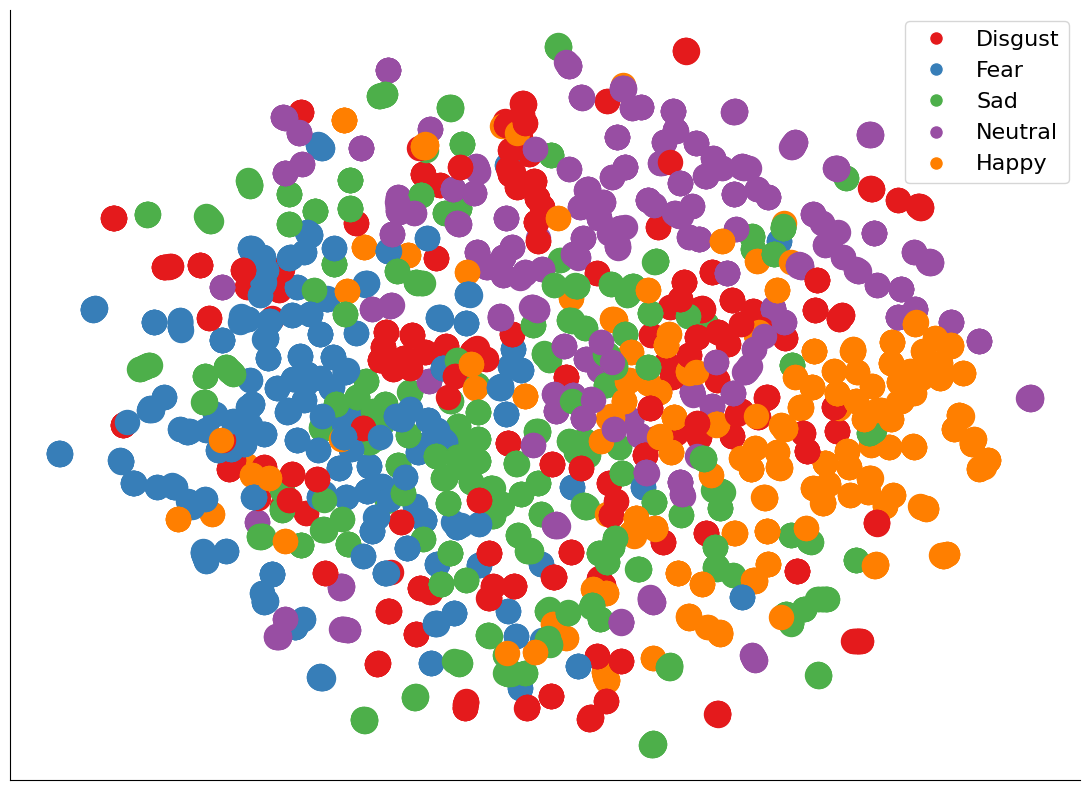

In [17]:
root_dir = 't-sne/LOO/SEEDV/'
fea_name = root_dir+'DATASET_loo_SEEDV_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 16
emo_names = [
    'Disgust',
    'Fear',
    'Sad',
    'Neutral',
    'Happy'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo, sample_per_sub=200, color_name=emo_names, size=300, title='SEEDV_Pretrain',
                              perplexity=8)

(138040, 512) (138040, 1) (138040,)
[4832, 3228, 5784, 4502, 2806, 6787, 190, 6536, 5674, 5181, 5468, 5261, 2469, 4544, 5243, 1726, 5004, 2363, 5402, 4961, 2202, 3765, 205, 326, 5687, 3657, 3819, 2311, 1669, 915, 4557, 1673, 4859, 1230, 2517, 264, 6152, 4158, 4258, 6281, 5996, 3552, 3697, 6197, 201, 6656, 5329, 1596, 4508, 1057, 4205, 3864, 1421, 1417, 5442, 3835, 5827, 3209, 5494, 5071, 5379, 1563, 1328, 2109, 1280, 5290, 2113, 2844, 3918, 4941, 6182, 3711, 5550, 5782, 4916, 6684, 2360, 1039, 3756, 3119, 5260, 4825, 5302, 5115, 2118, 5798, 2190, 1576, 2270, 2401, 3658, 3865, 6607, 6829, 5841, 2134, 3372, 3774, 5603, 2723, 6939, 10355, 9468, 13643, 13290, 12176, 8709, 10890, 10670, 12624, 9720, 8205, 9818, 10810, 9611, 9507, 8734, 8663, 8298, 9137, 13003, 12890, 12423, 11353, 10955, 12266, 8826, 12172, 8153, 10928, 7259, 13295, 8640, 13285, 7318, 9519, 11878, 10610, 10661, 10548, 6952, 10473, 12079, 12722, 13144, 7398, 13600, 9752, 9772, 7235, 7662, 10985, 11250, 13599, 10737, 13515, 1

/tmp/ipykernel_3356326/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


['Happy', 'Neutrial', 'Disgust', 'Sad', 'Anger', 'Surprise', 'Fear']


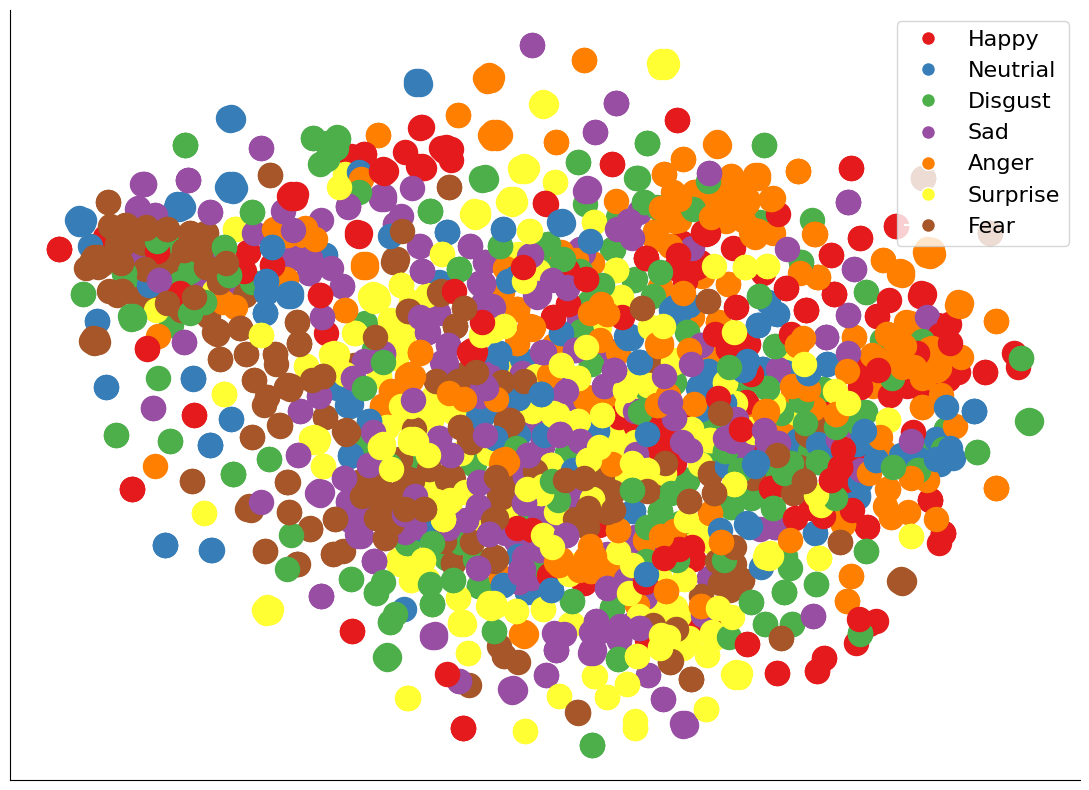

In [19]:
root_dir = 't-sne/LOO/SEEDVII/'
fea_name = root_dir+'DATASET_loo_SEEDVII_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 20
emo_names = [
    'Happy',
    'Neutrial',
    'Disgust',
    'Sad',
    'Anger',
    'Surprise',
    'Fear'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo, sample_per_sub=100, color_name=emo_names, size=300, title='SEEDVII_Pretrain',
                              perplexity=60)

In [ ]:
root_dir = 't-sne/ME/SEEDVII/'
fea_name = root_dir+'SEEDVII_ME_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 20
emo_names = [
    'Happy',
    'Neutrial',
    'Disgust',
    'Sad',
    'Anger',
    'Surprise',
    'Fear'
    ]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo, sample_per_sub=100, color_name=emo_names, size=300, title='SEEDVII_DE',
                              perplexity=30,
                              max_iter=50000,)

(138040, 310) (138040, 1) (138040,)
[265, 5980, 3077, 5730, 1593, 4699, 1626, 3031, 4394, 6752, 3061, 5249, 2609, 5785, 6815, 1215, 5947, 3410, 898, 4479, 2195, 4517, 1539, 1768, 5301, 1697, 96, 6814, 1053, 5484, 1902, 5222, 608, 6167, 337, 6544, 1434, 6000, 2778, 4240, 6857, 2203, 5102, 4268, 2049, 2931, 4427, 2599, 3472, 3580, 1471, 1866, 6457, 5043, 2592, 5726, 5011, 5748, 3252, 5527, 1646, 1836, 2171, 6829, 1642, 1914, 1000, 1239, 1886, 3786, 2735, 4878, 2855, 2304, 6168, 2448, 6293, 2540, 3710, 5086, 5924, 5800, 838, 2109, 6731, 3956, 1490, 5196, 877, 1056, 6706, 829, 2486, 1199, 2745, 103, 4801, 2868, 3657, 5779, 13115, 9297, 12870, 10136, 8541, 9502, 13769, 13244, 12836, 10529, 13299, 10604, 8354, 7611, 9461, 11097, 10249, 12036, 10597, 7762, 9546, 9202, 7832, 11416, 11956, 7874, 11463, 12878, 13738, 8667, 11930, 9042, 11329, 13444, 7215, 7896, 12268, 7578, 7617, 13350, 12936, 9178, 13172, 13505, 7175, 8528, 9495, 10414, 8048, 8857, 12225, 10596, 7325, 7807, 9167, 7110, 13501, 7

KeyboardInterrupt: 

(7280, 512) (7280, 1) (7280,)
[340, 245, 208, 186, 138, 175, 287, 147, 320, 309, 269, 215, 62, 173, 319, 91, 66, 234, 299, 298, 118, 196, 300, 341, 116, 317, 294, 209, 335, 117, 50, 146, 42, 259, 155, 284, 223, 157, 321, 232, 39, 110, 211, 59, 324, 149, 289, 204, 105, 316, 311, 20, 202, 73, 167, 241, 126, 220, 195, 193, 210, 354, 246, 257, 2, 45, 43, 102, 46, 293, 41, 288, 148, 266, 113, 84, 200, 327, 150, 14, 265, 74, 303, 127, 115, 12, 268, 198, 271, 214, 23, 132, 160, 140, 212, 243, 92, 61, 6, 252, 565, 659, 395, 704, 706, 682, 436, 370, 454, 591, 493, 727, 675, 603, 710, 713, 489, 666, 605, 453, 494, 366, 718, 698, 680, 368, 524, 618, 715, 594, 703, 611, 416, 705, 455, 413, 467, 464, 619, 697, 561, 597, 488, 495, 500, 717, 544, 550, 509, 414, 481, 683, 503, 526, 382, 376, 617, 472, 473, 627, 378, 448, 650, 498, 390, 581, 604, 695, 537, 642, 562, 585, 492, 426, 518, 528, 633, 602, 598, 656, 490, 556, 555, 654, 610, 716, 474, 651, 444, 391, 389, 600, 641, 535, 700, 383, 643, 386, 471

/tmp/ipykernel_4025033/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


['Anger', 'Disgust', 'Fear', 'Sad', 'Neutral', 'Amusement', 'Inspiration', 'Joy', 'Tenderness']


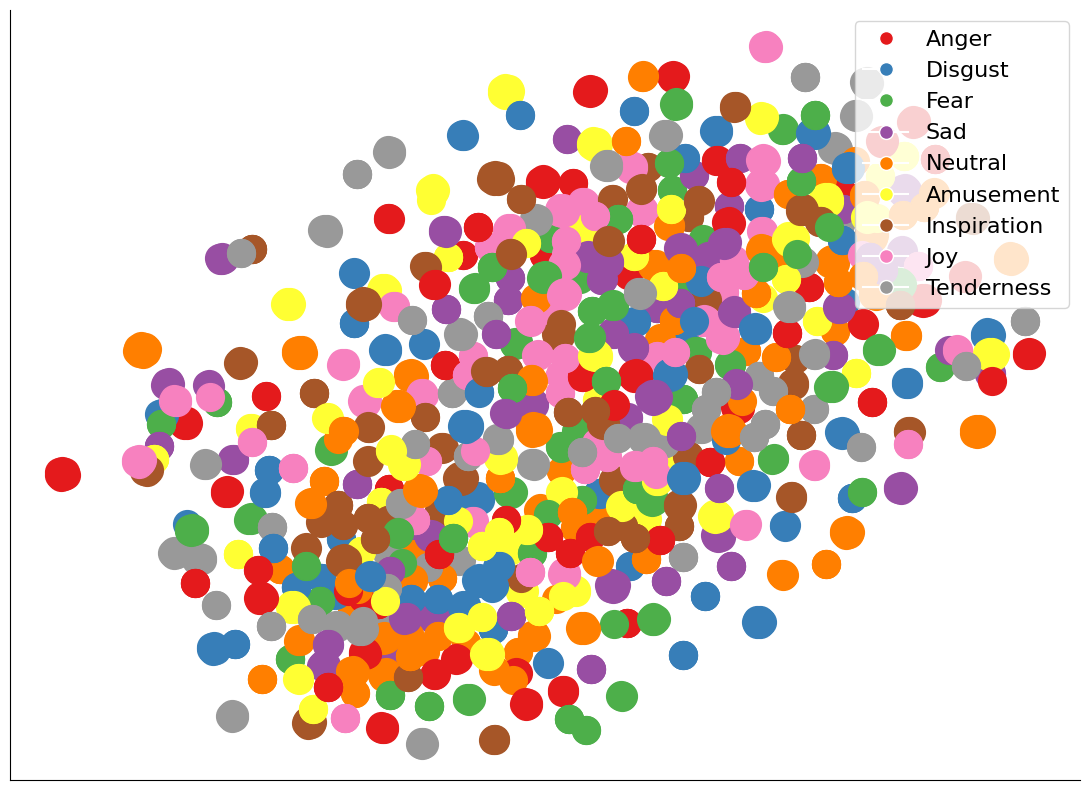

In [46]:
root_dir = 't-sne/LOO/FACED/'
fea_name = root_dir+'DATASET_loo_FACED_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 20
emo_names = [
    'Anger',       # 负面
    'Disgust',     # 负面
    'Fear',        # 负面
    'Sad',         # 负面
    'Neutral',     # 中性
    'Amusement',   # 正面
    'Inspiration', # 正面
    'Joy',         # 正面
    'Tenderness'   # 正面
]
fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=100,
                            color_name=emo_names,
                            size=400,
                            title='FACED_pretrain',
                            max_iter=10000,
                            lr=500,
                            perplexity=30)

(7280, 150) (7280, 1) (7280,)
[48, 318, 219, 131, 216, 191, 358, 171, 159, 288, 260, 263, 298, 337, 297, 188, 82, 193, 55, 26, 245, 54, 28, 67, 129, 2, 186, 181, 98, 261, 136, 240, 145, 160, 110, 207, 248, 201, 342, 328, 30, 252, 319, 320, 295, 281, 105, 47, 132, 195, 78, 95, 64, 206, 273, 308, 220, 223, 294, 19, 114, 99, 155, 211, 133, 354, 4, 118, 299, 262, 330, 259, 172, 169, 256, 233, 135, 74, 264, 208, 341, 45, 270, 355, 35, 42, 310, 247, 268, 7, 292, 12, 72, 174, 130, 287, 234, 60, 246, 339, 382, 598, 716, 491, 366, 400, 619, 499, 683, 671, 692, 509, 398, 627, 696, 462, 656, 421, 501, 534, 516, 500, 395, 385, 602, 464, 412, 368, 472, 497, 397, 517, 476, 704, 492, 672, 693, 604, 576, 705, 555, 660, 669, 486, 403, 618, 505, 590, 530, 649, 641, 380, 527, 629, 677, 475, 634, 603, 566, 493, 684, 514, 489, 621, 463, 496, 551, 599, 578, 396, 702, 579, 506, 648, 445, 565, 596, 537, 378, 553, 474, 542, 414, 680, 570, 522, 526, 587, 608, 601, 531, 465, 552, 611, 610, 434, 652, 558, 539, 65

/tmp/ipykernel_4025033/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


['Anger', 'Disgust', 'Fear', 'Sad', 'Neutral', 'Amusement', 'Inspiration', 'Joy', 'Tenderness']


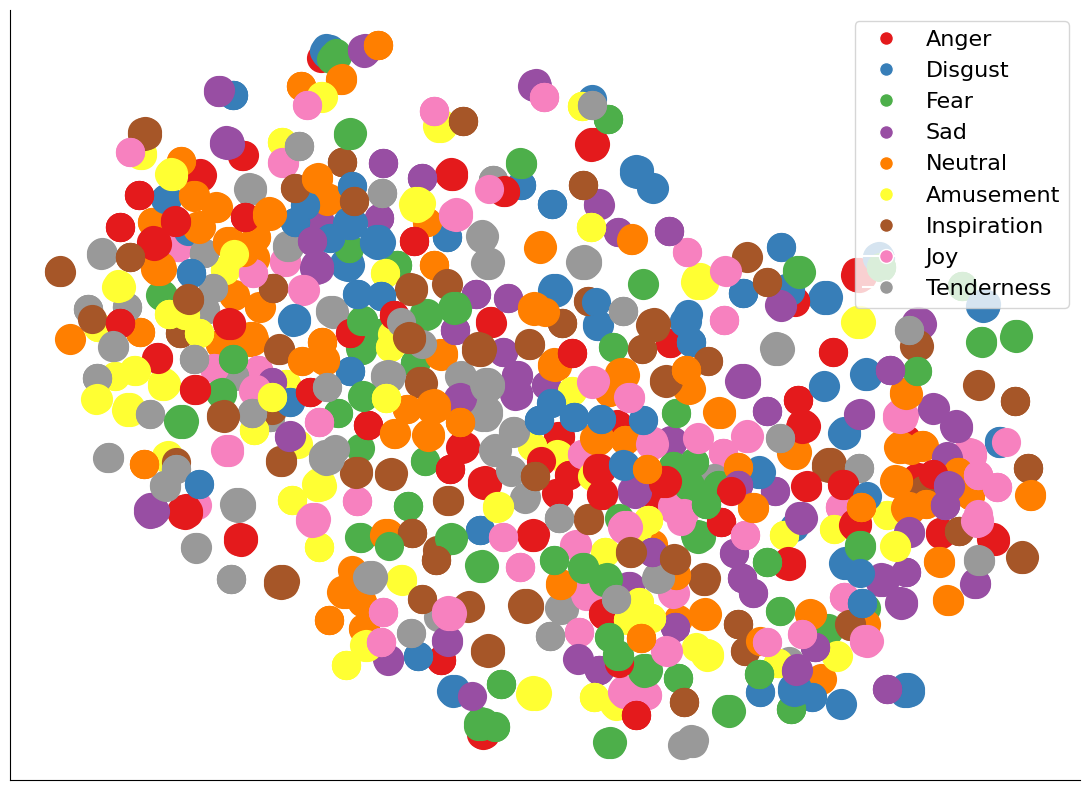

In [47]:
root_dir = 't-sne/ME/FACED/'
fea_name = root_dir+'DATASET_loo_FACED_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 20
emo_names = [
    'Anger',       # 负面
    'Disgust',     # 负面
    'Fear',        # 负面
    'Sad',         # 负面
    'Neutral',     # 中性
    'Amusement',   # 正面
    'Inspiration', # 正面
    'Joy',         # 正面
    'Tenderness'   # 正面
]
fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=100,
                            color_name=emo_names,
                            size=400,
                            title='FACED_ME',
                            max_iter=10000,
                            lr=500,
                            perplexity=30)

(35840, 512) (35840, 1) (35840,)
[908, 179, 879, 16, 203, 195, 1048, 255, 492, 262, 106, 993, 512, 274, 903, 28, 421, 598, 878, 146, 486, 108, 12, 174, 396, 175, 862, 552, 1116, 1063, 1073, 463, 472, 436, 1050, 873, 128, 760, 371, 323, 577, 960, 759, 872, 869, 118, 643, 354, 817, 286, 212, 445, 856, 73, 846, 654, 964, 14, 1051, 376, 289, 115, 840, 1001, 597, 560, 134, 124, 318, 1093, 309, 729, 959, 390, 247, 197, 213, 291, 302, 280, 963, 656, 1028, 178, 527, 84, 321, 764, 768, 911, 122, 350, 683, 576, 895, 774, 11, 1077, 538, 843, 833, 221, 441, 502, 423, 551, 147, 207, 97, 411, 839, 988, 234, 333, 930, 590, 1010, 372, 713, 820, 433, 894, 137, 483, 837, 699, 841, 942, 123, 283, 613, 558, 170, 524, 581, 1029, 149, 503, 938, 47, 924, 304, 382, 550, 780, 981, 1084, 485, 101, 1027, 763, 529, 847, 567, 1068, 385, 896, 980, 650, 23, 185, 132, 1061, 454, 898, 904, 734, 121, 657, 982, 718, 575, 362, 876, 438, 501, 1049, 821, 89, 915, 26, 720, 373, 464, 258, 688, 301, 770, 828, 1058, 51, 1069, 

/tmp/ipykernel_4025033/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


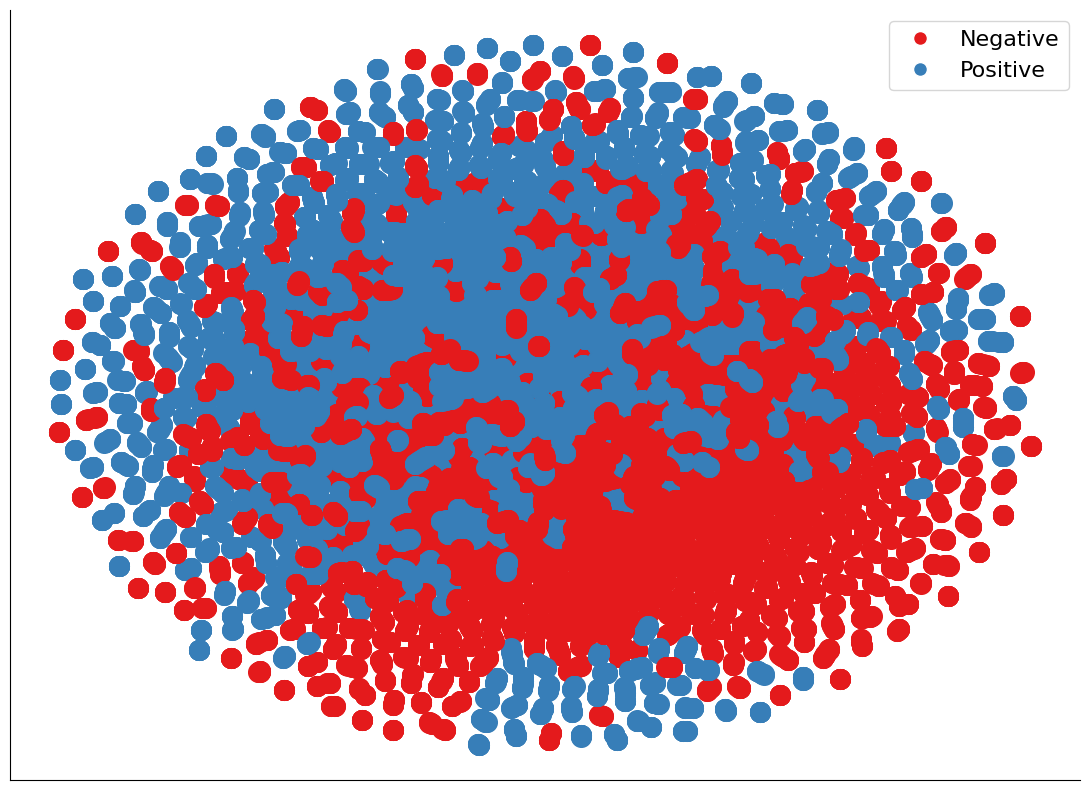

In [5]:
root_dir = 't-sne/LOO/DEAP/'
fea_name = root_dir+'DATASET_loo_DEAP_f5_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 32
emo_names = [
    'Negative','Positive'
]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=400,
                            color_name=emo_names,
                            size=200,
                            title='DEAP_pretrain',
                            perplexity=5,
                            lr=500,
                            max_iter=1000,)

(35840, 160) (35840, 1) (35840,)
[435, 990, 288, 378, 979, 583, 60, 145, 888, 1010, 391, 171, 559, 463, 234, 1050, 751, 68, 1068, 437, 817, 1024, 19, 487, 841, 713, 668, 379, 738, 788, 1106, 409, 312, 973, 982, 33, 265, 1038, 737, 669, 471, 185, 129, 352, 304, 256, 930, 659, 119, 562, 647, 1071, 117, 1059, 430, 945, 1102, 851, 351, 384, 262, 254, 601, 89, 371, 515, 245, 218, 259, 790, 592, 63, 112, 733, 271, 204, 1027, 1110, 138, 627, 911, 427, 923, 556, 142, 933, 608, 611, 912, 858, 70, 428, 268, 663, 240, 211, 407, 250, 424, 1118, 1012, 894, 193, 341, 416, 450, 320, 387, 10, 764, 594, 825, 507, 618, 394, 333, 501, 878, 358, 215, 739, 873, 955, 345, 17, 645, 118, 148, 37, 386, 569, 1007, 652, 1080, 168, 426, 949, 960, 404, 511, 1001, 855, 189, 604, 906, 1083, 152, 640, 140, 236, 605, 804, 31, 887, 1105, 697, 370, 55, 1021, 356, 634, 795, 673, 339, 475, 123, 88, 1072, 181, 111, 116, 781, 678, 857, 69, 6, 958, 890, 87, 879, 588, 755, 681, 403, 1095, 316, 237, 699, 881, 623, 406, 918, 61

/tmp/ipykernel_4025033/4091707037.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


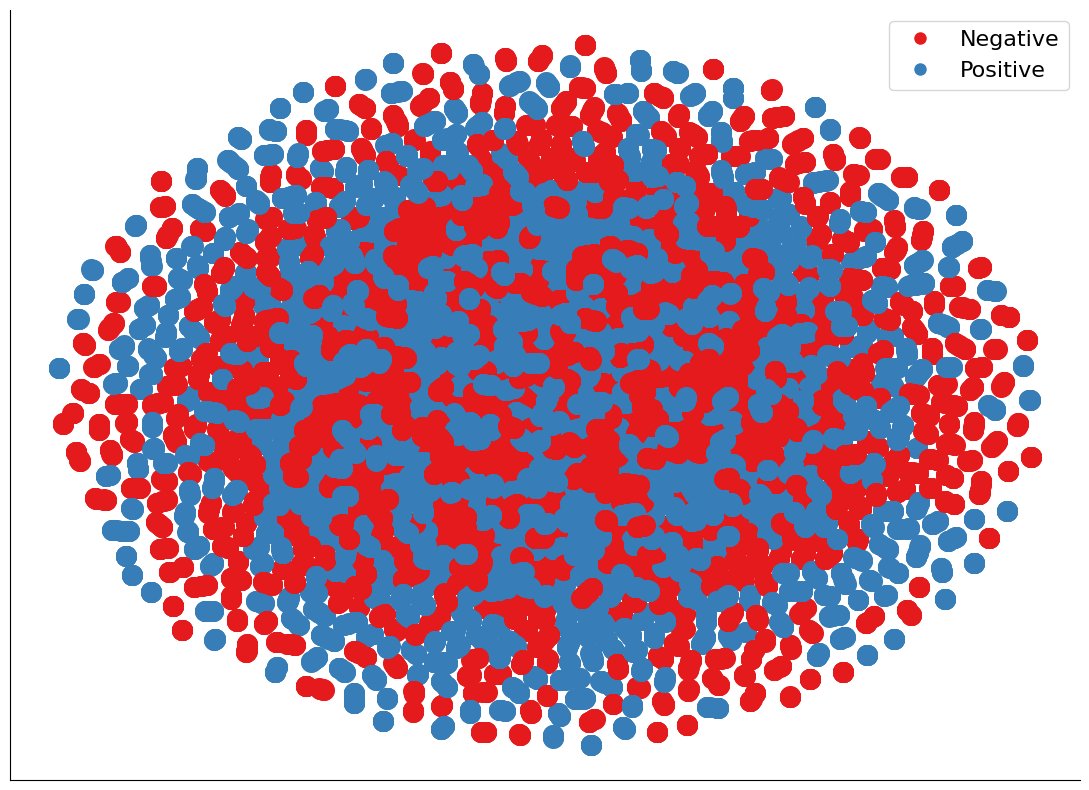

In [4]:
root_dir = 't-sne/ME/DEAP/'
fea_name = root_dir+'ME_NONORM_all_fea_me.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 32
emo_names = [
    'Negative','Positive'
]

fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=400,
                            color_name=emo_names,
                            size=200,
                            title='DEAP_ME',
                            perplexity=5,
                            lr=500,
                            max_iter=1000,)

(35840, 512) (35840, 1) (35840,)
[864, 653, 110, 900, 1058, 197, 480, 417, 853, 236, 834, 66, 787, 305, 2, 177, 488, 976, 802, 1093, 477, 619, 977, 546, 591, 516, 1022, 1111, 270, 689, 393, 88, 797, 265, 774, 12, 269, 29, 1112, 677, 92, 200, 878, 563, 154, 710, 334, 756, 140, 1092, 527, 930, 664, 893, 548, 980, 1074, 631, 970, 497, 340, 1013, 389, 630, 274, 91, 668, 676, 624, 1047, 530, 108, 1012, 589, 113, 704, 580, 670, 728, 753, 861, 416, 695, 28, 743, 277, 525, 271, 943, 327, 926, 328, 539, 413, 234, 939, 442, 307, 855, 1054, 822, 148, 540, 541, 798, 476, 297, 111, 1030, 1080, 562, 588, 186, 268, 817, 155, 199, 982, 275, 657, 755, 135, 461, 865, 342, 576, 511, 39, 104, 251, 909, 850, 46, 355, 295, 868, 600, 384, 1113, 116, 959, 290, 957, 504, 564, 87, 842, 933, 635, 348, 341, 931, 684, 318, 227, 871, 949, 487, 894, 1038, 287, 937, 3, 62, 224, 841, 331, 121, 184, 513, 967, 612, 426, 741, 582, 1089, 578, 538, 498, 627, 76, 23, 247, 776, 738, 245, 966, 122, 432, 174, 626, 1, 681, 867,

/tmp/ipykernel_2799179/75742618.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1')


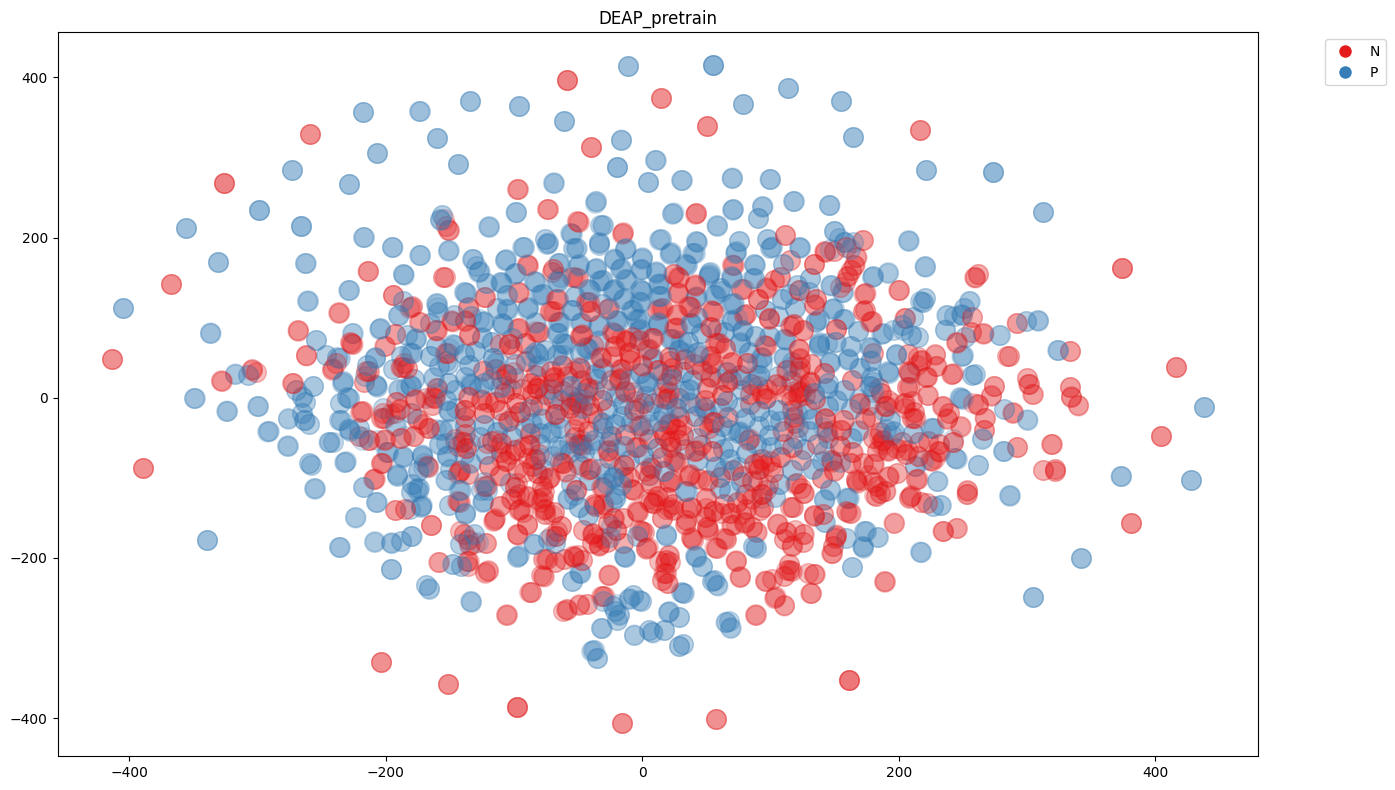

In [ ]:
root_dir = 't-sne/LOO/EMOEEG/'
fea_name = root_dir+'DATASET_loo_DEAP_all_fea_epoch=19.ckptme.npy'
emo_label_name = root_dir+'onesub_label.npy'
n_sub = 20
emo_names = [
    'Anger',       # 负面
    'Disgust',     # 负面
    'Fear',        # 负面
    'Sad',         # 负面
    'Neutral',     # 中性
    'Amusement',   # 正面
    'Inspiration', # 正面
    'Joy',         # 正面
    'Tenderness'   # 正面
]
fea, label_sub, label_emo = loadfea_single(fea_name=fea_name, set_index=0, n_sub=n_sub, return_emo=True, emo_label_name=emo_label_name)
print(fea.shape, label_sub.shape, label_emo.shape)
balanced_sample_visualization(fea, label_sub, label_emo,
                            sample_per_sub=100,
                            color_name=emo_names,
                            size=400,
                            title='FACED_pretrain',
                            max_iter=10000,
                            lr=500,
                            perplexity=30)